In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/NaNdalal-dev/Churn-for-Bank-Customers/main/churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### **Removing RowNumber,CustomerId and Surname features**

In [ ]:
cols_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df.drop(cols_to_drop,axis=1,inplace=True)

In [ ]:
df.shape

(10000, 11)

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.Exited.unique()

array([1, 0])

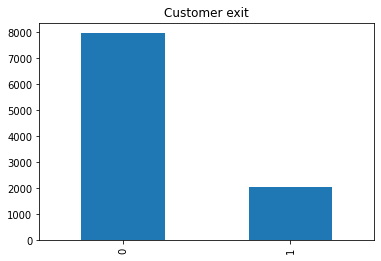

In [ ]:
#plt.figure(figsize=(10,10))
plt.title('Customer exit')
df.Exited.value_counts().plot(kind='bar')

plt.show()

### Frequency of country

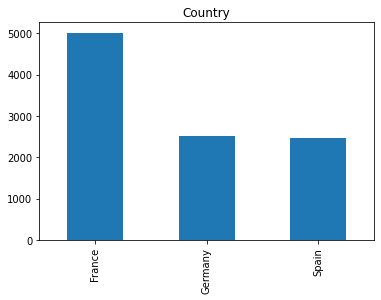

In [ ]:
plt.title('Country')
df['Geography'].value_counts().plot(kind='bar')
plt.show()

### Male and Female Ratio with respect to bank Exit

In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

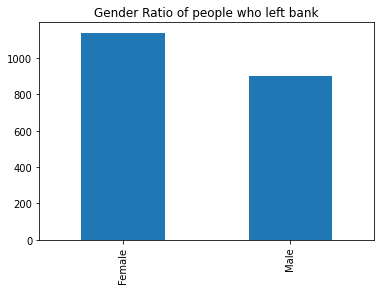

In [ ]:
plt.title('Gender Ratio of people who left bank')
df['Gender'][df['Exited'] == 1].value_counts().plot(kind='bar')
plt.show()

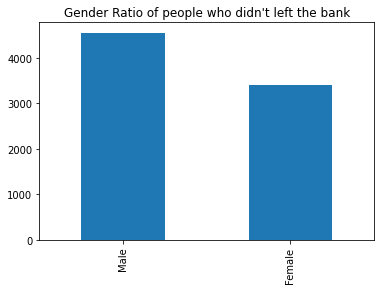

In [ ]:
plt.title("Gender Ratio of people who didn't left the bank")
df['Gender'][df['Exited'] == 0].value_counts().plot(kind='bar')
plt.show()

### CreditScore Histogram 

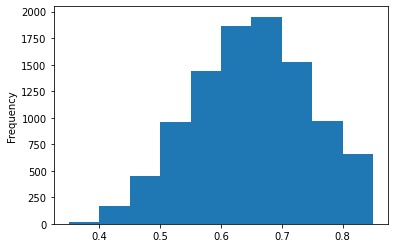

In [ ]:
(df['CreditScore']/1000).plot(kind='hist')
plt.show()

### Age Group Histogram

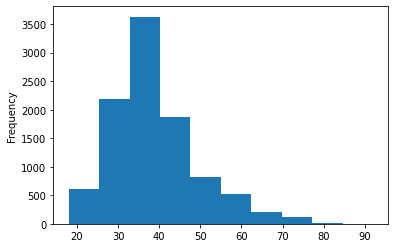

In [ ]:
df['Age'].plot(kind='hist')
plt.show()

### Age Group of people who left the bank

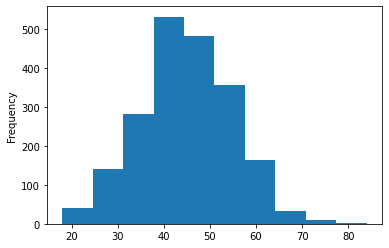

In [ ]:
df['Age'][df['Exited'] == 1].plot(kind='hist')
plt.show()

### Age Group of people who didn't left the bank

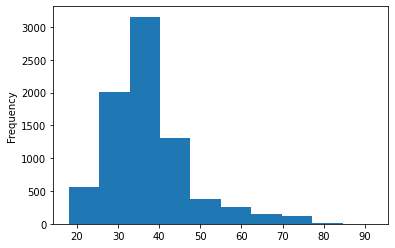

In [ ]:
df['Age'][df['Exited'] == 0].plot(kind='hist')
plt.show()

### Bank Balance histogram

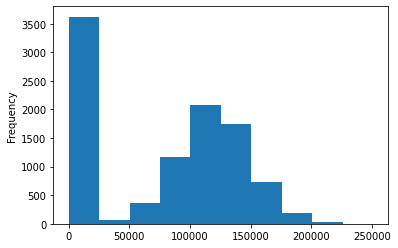

In [ ]:
df['Balance'].plot(kind='hist')
plt.show()

### Over 3500 people have 0 bank balance

In [ ]:
df['Balance'][df['Balance'] == 0].value_counts()

0.0    3617
Name: Balance, dtype: int64

## Exit status of people with zero bank balance

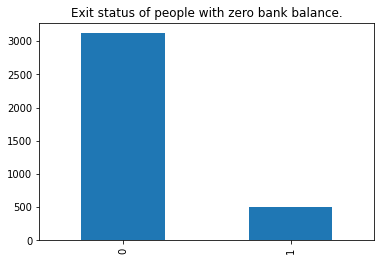

In [ ]:
plt.title('Exit status of people with zero bank balance.')
df['Exited'][df['Balance'] == 0].value_counts().plot(kind='bar')
plt.show()

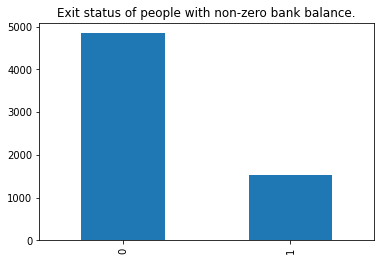

In [ ]:
plt.title('Exit status of people with non-zero bank balance.')
df['Exited'][df['Balance'] != 0].value_counts().plot(kind='bar')
plt.show()

### Estimated Salary histogram

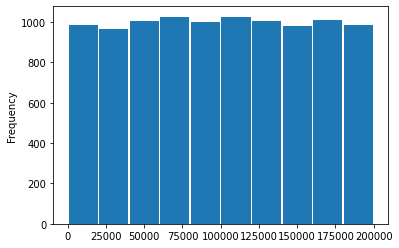

In [ ]:
df['EstimatedSalary'].plot(kind='hist',rwidth=0.95)
plt.show()

### Active People

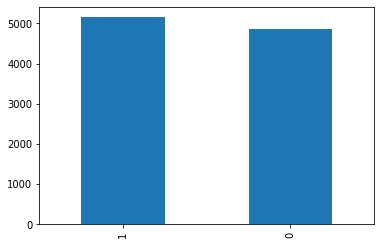

In [ ]:
df['IsActiveMember'].value_counts().plot(kind='bar')
plt.show()

### Number of InActive People and Number of people Who left bank





In [ ]:
df[(df['Exited'] == 1) & (df['IsActiveMember'] == 0)].shape[0]

1302

###  Number of Active People and Number of people Who didn't left bank

In [ ]:
df[(df['Exited'] == 1) & (df['IsActiveMember'] == 1)].shape[0]

735

### Number of Active People and Number of people Who left bank

In [ ]:
df[(df['Exited'] == 1) & (df['IsActiveMember'] == 1)].shape[0]

735

### Number of InActive People and Number of people Who didn't left bank

In [ ]:
df[(df['Exited'] == 1) & (df['IsActiveMember'] == 0)].shape[0]

1302

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

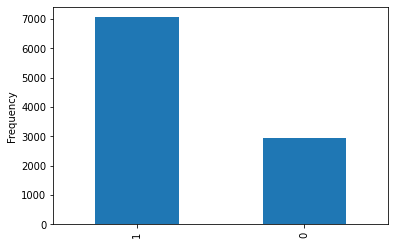

In [ ]:
df['HasCrCard'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

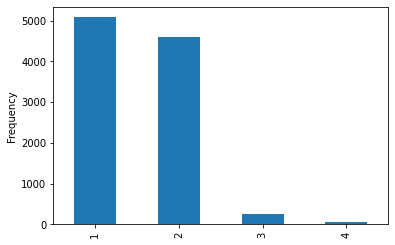

In [ ]:
df['NumOfProducts'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

### Replacing Male to 1 and Female to 0

In [ ]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)
df['Gender'].unique()

array([0, 1])

### One Hot Encoding the country

In [ ]:
df = pd.get_dummies(data=df, columns=['Geography'])

In [ ]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [ ]:
df.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [ ]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


## Scaling the features

In [ ]:
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Gender', 'Balance', 'EstimatedSalary']
scale = MinMaxScaler()
for col in cols_to_scale:
    scale.fit(df[[col]])
    df[col] = scale.fit_transform(df[[col]]).flatten()


In [ ]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0.0,0.324324,0.2,0.000000,1,1,1,0.506735,1,1,0,0
1,0.516,0.0,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,0,1
2,0.304,0.0,0.324324,0.8,0.636357,3,1,0,0.569654,1,1,0,0
3,0.698,0.0,0.283784,0.1,0.000000,2,0,0,0.469120,0,1,0,0
4,1.000,0.0,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,0,1


In [ ]:
x = df.drop(['Exited'],axis=1)
y = df['Exited']

In [ ]:
x = x.drop(['Tenure'],axis=1)

## Data Spliting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
x_train.shape

(7500, 11)

In [ ]:
y_train.shape

(7500,)

In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(11, input_shape=(11,), activation='relu'),
                          keras.layers.Dense(6, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid'),

])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],

)

In [ ]:
model.fit(x_test, y_test, epochs=1000)

Epoch 1/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8608
Epoch 2/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.3392 - accuracy: 0.8600
Epoch 3/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.3429 - accuracy: 0.8616
Epoch 4/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.8588
Epoch 5/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.3385 - accuracy: 0.8612
Epoch 6/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.8612
Epoch 7/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8636
Epoch 8/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.8628
Epoch 9/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8576
Epoch 10/1000
79/79 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8628

In [ ]:
model.evaluate(x_train,y_train)

235/235 [==============================] - 0s 2ms/step - loss: 0.3748 - accuracy: 0.8463


[0.37475985288619995, 0.8462666869163513]

In [ ]:
model.evaluate(x_test, y_test)

79/79 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.8728


[0.3073963522911072, 0.8727999925613403]

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred[y_pred>=0.5] = 1
y_pred[y_pred<0.5] = 0

In [ ]:
y_pred = y_pred.flatten()

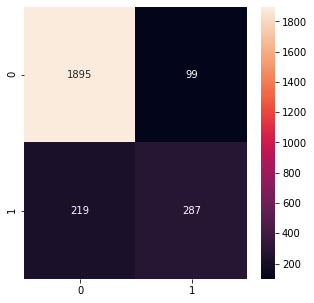

In [ ]:
y_pred_cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(y_pred_cm, annot=True,fmt='g')
plt.show()

In [ ]:
y_pred_train = model.predict(x_train).flatten()
y_pred_train[y_pred_train>=0.5] = 1
y_pred_train[y_pred_train<0.5] = 0

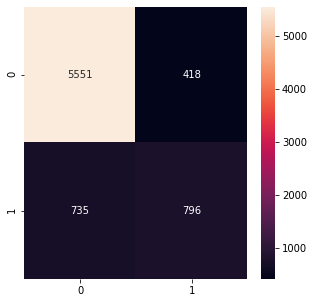

In [ ]:
y_pred_cm_train = confusion_matrix(y_train,y_pred_train)

plt.figure(figsize=(5,5))
sns.heatmap(y_pred_cm_train, annot=True,fmt='g')
plt.show()

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
exit0 = df[df['Exited'] == 0].sample(2000)
exit0.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
4818,0.804,0.0,0.243243,0.1,0.346108,1,1,1,0.526395,0,1,0,0
4434,0.566,0.0,0.378378,0.3,0.000000,2,1,0,0.601252,0,0,0,1
8082,0.844,1.0,0.243243,0.3,0.446515,1,1,1,0.934773,0,0,0,1
9776,0.794,1.0,0.148649,0.7,0.000000,2,1,1,0.708542,0,1,0,0
6427,0.792,1.0,0.256757,0.2,0.000000,2,1,0,0.715981,0,1,0,0


In [ ]:
exit1 = df[df['Exited'] == 1]
exit1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0.0,0.324324,0.2,0.000000,1,1,1,0.506735,1,1,0,0
2,0.304,0.0,0.324324,0.8,0.636357,3,1,0,0.569654,1,1,0,0
5,0.590,1.0,0.351351,0.8,0.453394,2,1,0,0.748797,1,0,0,1
7,0.052,0.0,0.148649,0.4,0.458540,4,1,0,0.596733,1,0,1,0
16,0.606,1.0,0.540541,0.1,0.528513,1,1,0,0.025433,1,0,1,0


In [ ]:
new_df = pd.concat([exit0,exit1])
new_df.shape

(4037, 13)

In [ ]:
new_df['Exited'].value_counts()

1    2037
0    2000
Name: Exited, dtype: int64

In [ ]:
x = new_df.drop(['Tenure','Exited'],axis=1)
y = new_df['Exited']

In [ ]:
x.shape

(4037, 11)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
x_train.shape

(3027, 11)

In [ ]:
y_train.shape

(3027,)

In [ ]:
y_train.value_counts()

1    1537
0    1490
Name: Exited, dtype: int64

In [ ]:
y_test.value_counts()

0    510
1    500
Name: Exited, dtype: int64

In [ ]:
model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
95/95 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.7912
Epoch 2/1000
95/95 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.7863
Epoch 3/1000
95/95 [==============================] - 0s 2ms/step - loss: 0.4535 - accuracy: 0.7879
Epoch 4/1000
95/95 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.7909
Epoch 5/1000
95/95 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.7919
Epoch 6/1000
95/95 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.7906
Epoch 7/1000
95/95 [==============================] - 0s 2ms/step - loss: 0.4537 - accuracy: 0.7886
Epoch 8/1000
95/95 [==============================] - 0s 2ms/step - loss: 0.4538 - accuracy: 0.7899
Epoch 9/1000
95/95 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.7886
Epoch 10/1000
95/95 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.7922

In [ ]:
model.evaluate(x_test,y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.7554


[0.4874359667301178, 0.7554455399513245]

In [ ]:
y_pred = model.predict(x_test).flatten()

In [ ]:

y_pred[y_pred>=0.5] = 1
y_pred[y_pred<0.5] = 0

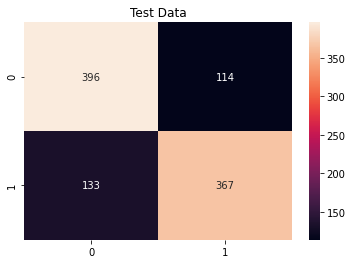

In [ ]:
y_pred_cm = confusion_matrix(y_test,y_pred)
plt.title('Test Data')
sns.heatmap(y_pred_cm,annot=True,fmt='g')
plt.show()

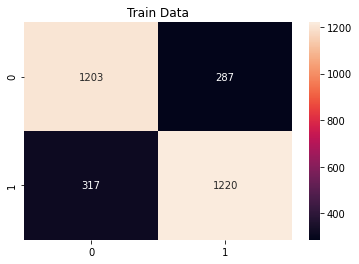

In [ ]:
y_pred_train = model.predict(x_train).flatten()
y_pred_train[y_pred_train>=0.5] = 1
y_pred_train[y_pred_train<0.5] = 0
y_pred_train_cm = confusion_matrix(y_train,y_pred_train)

plt.title('Train Data')
sns.heatmap(y_pred_train_cm,annot=True,fmt='g')
plt.show()